Import libraries

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

1. Moments

In [2]:
img = cv.imread('../../images/star.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

{'m00': 20612.5, 'm10': 2132893.833333333, 'm01': 1526416.1666666665, 'm20': 278538862.4166666, 'm11': 158994786.625, 'm02': 137802970.41666666, 'm30': 40728463295.15, 'm21': 20920909578.483334, 'm12': 14422969687.216667, 'm03': 13916751690.45, 'mu20': 57836079.917146444, 'mu11': 1047733.672488749, 'mu02': 24767369.986764386, 'mu30': -62816675.30971527, 'mu21': 77458662.01050425, 'mu12': 8528884.363070488, 'mu03': 43844000.16923714, 'nu20': 0.13612488060637562, 'nu11': 0.0024659800816225035, 'nu02': 0.05829328832818613, 'nu30': -0.0010297890633591677, 'nu21': 0.001269823380616179, 'nu12': 0.0001398187948731924, 'nu03': 0.0007187593365230993}


In [3]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

2. Contour Area

In [4]:
area = cv.contourArea(cnt)
print(area)

20612.5


3. Contour Perimeter

In [5]:
perimeter = cv.arcLength(cnt,True)
print(perimeter)

938.4924212694168


4. Contour Approximation

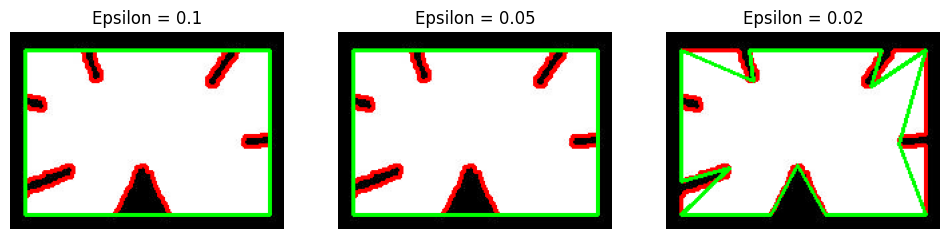

In [6]:
# Define a range of epsilon values to test
epsilon_values = [0.1, 0.05, 0.02]

# Create subplots for each epsilon value
plt.figure(figsize=(12, 4))
for i, epsilon in enumerate(epsilon_values):
    # Approximate the contour with the specified epsilon
    approx = cv.approxPolyDP(cnt, epsilon * cv.arcLength(cnt, True), True)

    # Create a color image for visualization
    result_image = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

    # Draw the original contour in blue
    cv.drawContours(result_image, [cnt], -1, (0, 0, 255), 2)

    # Draw the approximated contour in green
    cv.drawContours(result_image, [approx], -1, (0, 255, 0), 2)

    # Convert the BGR image to RGB for displaying with pyplot
    result_rgb = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)

    # Plot the image for this epsilon value
    plt.subplot(1, len(epsilon_values), i + 1)
    plt.imshow(result_rgb)
    plt.title(f'Epsilon = {epsilon}')
    plt.axis('off')

plt.show()


5. Convex Hull

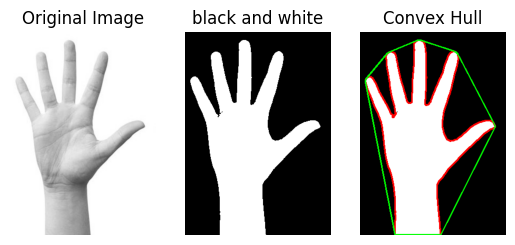

In [7]:
# Read the grayscale image
img = cv.imread('../../images/hand.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check with os.path.exists()"

# Apply thresholding to create a binary image
ret, thresh = cv.threshold(img, 240, 255, 0)
thresh = 255- thresh
# Find contours in the binary image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Assuming you want to calculate the convex hull for the first contour (contours[0])
cnt = contours[0]

# Calculate the convex hull of the contour
hull = cv.convexHull(cnt)

# Create a color image for visualization
result_image = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)

# Draw the original contour in red
cv.drawContours(result_image, [cnt], -1, (0, 0, 255), 2)

# Draw the convex hull in green
cv.drawContours(result_image, [hull], -1, (0, 255, 0), 2)

# Convert the BGR image to RGB for displaying with pyplot
result_rgb = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)

# Display the original contour and the convex hull
plt.subplot(131), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

plt.subplot(132), plt.imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
plt.title('black and white'), plt.axis('off')

plt.subplot(133), plt.imshow(result_rgb)
plt.title('Convex Hull'), plt.axis('off')

plt.show()

6. Checking Convexity

In [8]:
k = cv.isContourConvex(cnt)
print(k)

False


7. Bounding Rectangle

7.a. Straight Bounding Rectangle

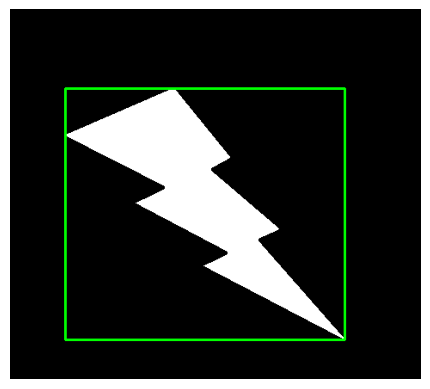

In [10]:
# Read the grayscale image
img = cv.imread('../../images/lightning.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check with os.path.exists()"

# Find contours in the grayscale image
contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Check if any contours were found
if len(contours) > 0:
    # Create a blank color image for drawing
    img_with_rectangle = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    
    # Assuming you want to work with the first contour (contours[0])
    cnt = contours[0]
    
    # Calculate the bounding rectangle
    x, y, w, h = cv.boundingRect(cnt)
    
    # Draw the bounding rectangle on the color image
    cv.rectangle(img_with_rectangle, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Display the image with the bounding rectangle
    plt.axis("off")
    plt.imshow(cv.cvtColor(img_with_rectangle, cv.COLOR_BGR2RGB))
    plt.show()
else:
    print("No contours found in the image.")

7.b. Rotated Rectangle

C:\Users\Omunk\AppData\Local\Temp\ipykernel_2872\2388268717.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


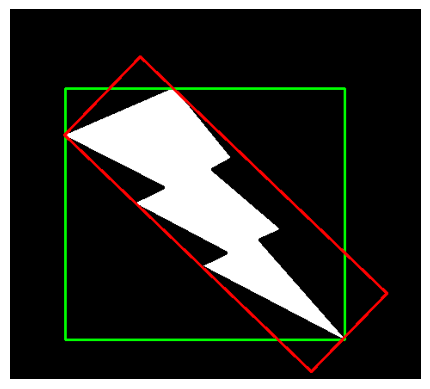

In [13]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(img_with_rectangle,[box],0,(0,0,255),2)

plt.axis("off")
plt.imshow(cv.cvtColor(img_with_rectangle, cv.COLOR_BGR2RGB))
plt.show()

8. Minimum Enclosing Circle

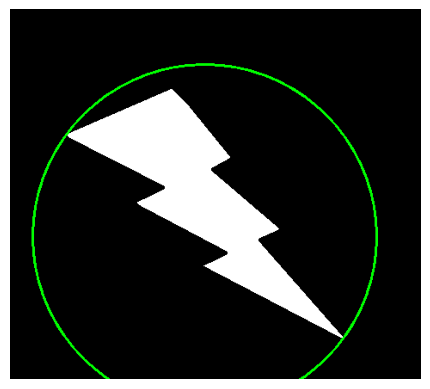

In [14]:
img_with_circle = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv.circle(img_with_circle,center,radius,(0,255,0),2)
plt.axis("off")
plt.imshow(cv.cvtColor(img_with_circle, cv.COLOR_BGR2RGB))
plt.show()

9. Fitting an Ellipse

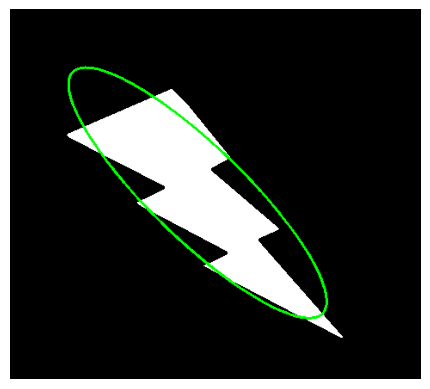

In [15]:
img_with_ellipse = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
ellipse = cv.fitEllipse(cnt)
cv.ellipse(img_with_ellipse,ellipse,(0,255,0),2)
plt.axis("off")
plt.imshow(cv.cvtColor(img_with_ellipse, cv.COLOR_BGR2RGB))
plt.show()

10. Fitting a Line

C:\Users\Omunk\AppData\Local\Temp\ipykernel_2872\762175972.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x*vy/vx) + y)
C:\Users\Omunk\AppData\Local\Temp\ipykernel_2872\762175972.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols-x)*vy/vx)+y)


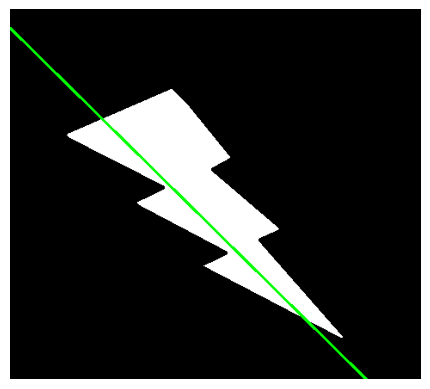

In [20]:
img_with_line = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
rows,cols = img_with_line.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv.line(img_with_line,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.axis("off")
plt.imshow(cv.cvtColor(img_with_line, cv.COLOR_BGR2RGB))
plt.show()